# 전국 신규 민간 아파트 분양가격 동향

2013년부터 최근까지 부동산 가격 변동 추세가 아파트 분양가에도 반영될까요? 공공데이터 포털에 있는 데이터를 Pandas 의 melt, concat, pivot, transpose 와 같은 reshape 기능을 활용해 분석해 봅니다. 그리고 groupby, pivot_table, info, describe, value_counts 등을 통한 데이터 요약과 분석을 해봅니다. 이를 통해 전혀 다른 형태의 두 데이터를 가져와 정제하고 병합하는 과정을 다루는 방법을 알게 됩니다. 전처리 한 결과에 대해 수치형, 범주형 데이터의 차이를 이해하고 다양한 그래프로 시각화를 할 수 있게 됩니다.


## 다루는 내용
* 공공데이터를 활용해 전혀 다른 두 개의 데이터를 가져와서 전처리 하고 병합하기
* 수치형 데이터와 범주형 데이터를 바라보는 시각을 기르기
* 데이터의 형식에 따른 다양한 시각화 방법 이해하기

## 실습
* 공공데이터 다운로드 후 주피터 노트북으로 로드하기
* 판다스를 통해 데이터를 요약하고 분석하기
* 데이터 전처리와 병합하기
* 수치형 데이터와 범주형 데이터 다루기
* 막대그래프(bar plot), 선그래프(line plot), 산포도(scatter plot), 상관관계(lm plot), 히트맵, 상자수염그림, swarm plot, 도수분포표, 히스토그램 실습하기

## 데이터셋
* 다운로드 위치 : https://www.data.go.kr/data/15061057/fileData.do

### 전국 평균 분양가격(2013년 9월부터 2015년 8월까지)
* 전국 공동주택의 3.3제곱미터당 평균분양가격 데이터를 제공

###  주택도시보증공사_전국 평균 분양가격(2019년 12월)
* 전국 공동주택의 연도별, 월별, 전용면적별 제곱미터당 평균분양가격 데이터를 제공
* 지역별 평균값은 단순 산술평균값이 아닌 가중평균값임

In [1]:
# 파이썬에서 쓸 수 있는 엑셀과도 유사한 판다스 라이브러리를 불러옵니다.
# 한글폰트 사용을 위해 matplotlib의 pyplot을 plt라는 별칭으로 불러옵니다.
# 수치계산을 위해 numpy를 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터시각화를 위한 폰트설정

In [2]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

<AxesSubplot:title={'center':'한글'}>

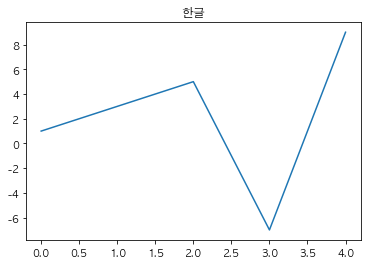

In [3]:
pd.Series([1, 3, 5, -7, 9]).plot(title = '한글')
#한글폰트 및 라이브러리가 잘 동작하는지 체크

## 데이터 로드
### 최근 파일 로드
공공데이터 포털에서 "주택도시보증공사_전국 평균 분양가격"파일을 다운로드 받아 불러옵니다.
이 때, 인코딩을 설정을 해주어야 한글이 깨지지 않습니다.
보통 엑셀로 저장된 한글의 인코딩은 cp949 혹은 euc-kr로 되어 있습니다.
df_last 라는 변수에 최근 분양가 파일을 다운로드 받아 로드합니다.

* 한글인코딩 : [‘설믜를 설믜라 못 부르는’ 김설믜씨 “제 이름을 지켜주세요” : 사회일반 : 사회 : 뉴스 : 한겨레](http://www.hani.co.kr/arti/society/society_general/864914.html)

데이터를 로드한 뒤 shape를 통해 행과 열의 갯수를 출력합니다.

In [4]:
# 최근 분양가 파일을 로드해서 df_last 라는 변수에 담습니다.
# 파일로드시 OSError가 발생한다면, engine="python"을 추가해 보세요.
# 윈도우에서 파일탐색기의 경로를 복사해서 붙여넣기 했는데도 파일을 불러올 수 없다면
# 아마도 경로에 있는 ₩ 역슬래시 표시를 못 읽어왔을 가능성이 큽니다. 
# r"경로명" 으로 적어주세요.
# r"경로명"으로 적게 되면 경로를 문자 그대로(raw) 읽으라는 의미입니다.

%ls 0.data

seoul-covid19-2021-01-03.csv
seoul-covid19-2021-05-11.csv
seoul-covid19-2021-09-11.csv
seoul-covid19-2021-11-22.csv
전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv
주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv


In [5]:
# head 로 파일을 미리보기 합니다.
# 메소드 뒤에 ?를 하면 자기호출 이라는 기능을 통해 메소드의 docstring을 출력합니다.
# 메소드의 ()괄호 안에서 Shift + Tab키를 눌러도 같은 문서를 열어볼 수 있습니다.
# Shift + Tab + Tab 을 하게 되면 팝업창을 키울 수 있습니다.
df_last = pd.read_csv("0.data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv", encoding = "cp949")
df_last.head()

# encoding 설정을 해주지 않으면 글씨가 깨짐(참고)

,지역명,규모구분,연도,월,분양가격
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


#df_first >> 분양가격의 경우 평당 기준

#df_last >> 분양가격의 경우 3.3제곱미터 기준 임으로,

#단위를 어느한쪽으로 통일해야함 ( 이때는 일을 준사람한테 물어보고 한가지 기준으로 정하는게 정신건강에 좋음:) )

### 2015년 부터 최근까지의 데이터 로드
전국 평균 분양가격(2013년 9월부터 2015년 8월까지) 파일을 불러옵니다.
df_first 라는 변수에 담고 shape로 행과 열의 갯수를 출력합니다.

In [6]:
# 해당되는 폴더 혹은 경로의 파일 목록을 출력해 줍니다.
df_first = pd.read_csv("0.data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv", encoding = "cp949")
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [7]:
# df_first 에 담고 shape로 행과 열의 수를 출력해 봅니다.
df_first.shape


(17, 22)

In [8]:
# df_first 변수에 담긴 데이터프레임을 head로 미리보기 합니다.


In [9]:
# df_first 변수에 담긴 데이터프레임을 tail로 미리보기 합니다.


### 데이터 요약하기

In [10]:
# info 로 요약합니다.
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역명     6120 non-null   object
 1   규모구분    6120 non-null   object
 2   연도      6120 non-null   int64 
 3   월       6120 non-null   int64 
 4   분양가격    5641 non-null   object
dtypes: int64(2), object(3)
memory usage: 239.2+ KB


### 결측치 보기

isnull 혹은 isna 를 통해 데이터가 비어있는지를 확인할 수 있습니다.
결측치는 True로 표시되는데, True == 1 이기 때문에 이 값을 다 더해주면 결측치의 수가 됩니다.

In [11]:
# isnull 을 통해 결측치를 봅니다.
df_last.isnull().sum()

#결측치가 생긴이유 >> 분양이 되지 않았을 경우  **도메인 지식이 있으면 이해하기 쉽다.

지역명       0
규모구분      0
연도        0
월         0
분양가격    479
dtype: int64

In [12]:
# isnull 을 통해 결측치를 구합니다.
df_last.isnull().mean() * 100

지역명     0.000000
규모구분    0.000000
연도      0.000000
월       0.000000
분양가격    7.826797
dtype: float64

<AxesSubplot:>

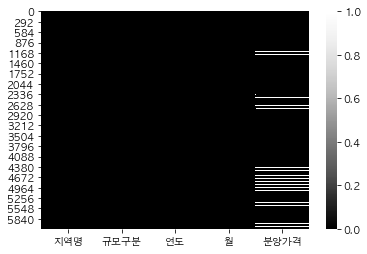

In [13]:
# isna 를 통해 결측치를 구합니다.
#df_last.isna()
sns.heatmap(df_last.isna(), cmap = "Greys_r") # 히트맵을 통해 결측치를 보는 시각적으로 방법

### 데이터 타입 변경
분양가격이 object(문자) 타입으로 되어 있습니다. 문자열 타입을 계산할 수 없기 때문에 수치 데이터로 변경해 줍니다. 결측치가 섞여 있을 때 변환이 제대로 되지 않습니다. 그래서 pd.to_numeric 을 통해 데이터의 타입을 변경합니다.

In [14]:
# info() 를 통해 데이터를 들여다보았을대 분양가격이 object형태였음 >> "1" +"2" = "12" 가 되기 때문에 타입을 변경해주어야함
#df_last["분양가격"].astype(int) # 띄어쓰기가 들어가 있기 때문에 공백을 제거해주어야함
df_last["분양가격"] = pd.to_numeric(df_last["분양가격"], errors = "coerce" ) # errors = "coerce"
df_last["분양가격"].head(1) 


# 데이터 타입의 경우 포함된 데이터의 형태에 따라 우선순위가 int < float < object로 결정된다.

0    5841.0
Name: 분양가격, dtype: float64

### 평당분양가격 구하기
공공데이터포털에 올라와 있는 2013년부터의 데이터는 평당분양가격 기준으로 되어 있습니다.
분양가격을 평당기준으로 보기위해 3.3을 곱해서 "평당분양가격" 컬럼을 만들어 추가해 줍니다.

In [15]:
df_last["평당분양가격"] = df_last["분양가격"] * 3.3
df_last["평당분양가격"]

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
6115    27574.8
6116        NaN
6117    27753.0
6118        NaN
6119    25499.1
Name: 평당분양가격, Length: 6120, dtype: float64

In [16]:
df_last

,지역명,규모구분,연도,월,분양가격,평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7
...,...,...,...,...,...,...
6115,제주,모든면적,2021,9,8356.0,27574.8
6116,제주,전용면적 60제곱미터이하,2021,9,NaN,NaN
6117,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,9,8410.0,27753.0
6118,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,9,NaN,NaN


### 분양가격 요약하기

In [17]:
# info를 통해 분양가격을 봅니다.
df_last["분양가격"].describe()


count     5625.000000
mean      3459.317867
std       1411.776054
min       1868.000000
25%       2574.000000
50%       3067.000000
75%       3922.000000
max      13835.000000
Name: 분양가격, dtype: float64

In [18]:
# 변경 전 컬럼인 분양가격(㎡) 컬럼을 요약합니다.
#df_last["분양가격"].astype(str)
df_last["평당분양가격"].astype("object").describe()

count      5625.0
unique     2215.0
top       11203.5
freq         18.0
Name: 평당분양가격, dtype: float64

In [19]:
df_last["평당분양가격"].describe()

count     5625.000000
mean     11415.748960
std       4658.860978
min       6164.400000
25%       8494.200000
50%      10121.100000
75%      12942.600000
max      45655.500000
Name: 평당분양가격, dtype: float64

In [20]:
# 수치데이터로 변경된 분양가격 컬럼을 요약합니다.



### 규모구분을 전용면적 컬럼으로 변경
규모구분 컬럼은 전용면적에 대한 내용이 있습니다. 전용면적이라는 문구가 공통적으로 들어가고 규모구분보다는 전용면적이 좀 더 직관적이기 때문에 전용면적이라는 컬럼을 새로 만들어주고 기존 규모구분의 값에서 전용면적, 초과, 이하 등의 문구를 빼고 간결하게 만들어 봅니다.

이 때 str 의 replace 기능을 사용해서 예를들면 "전용면적 60㎡초과 85㎡이하"라면 "60㎡~85㎡" 로 변경해 줍니다.

* pandas 의 string-handling 기능을 좀 더 보고 싶다면 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [21]:
# 규모구분의 unique 값 보기

df_last["규모구분"].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [22]:
# 규모구분을 전용면적으로 변경하기
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적|제곱미터| |이하", "" , regex = True) #경고메시지 발생시 regex = True 입력 > 정규표현식을 의미
#replace("전용면적|제곱미터|이하", "" , regex = True) >> 전용면적|제곱미터 작성시 띄어쓰기하면 적용 안됨 (참고)
df_last["전용면적"] = df_last["전용면적"].str.replace("초과", "~")
df_last.head()

# 데이터가 문자로 되어있으면 숫자보다 용량이 크다 > 문자를 최소화하는게 데이터 용량을 적게 관리할 수 있음


,지역명,규모구분,연도,월,분양가격,평당분양가격,전용면적
0,서울,모든면적,2015,10,5841.0,19275.3,모든면적
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6,60
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6,60~85
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3,85~102
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7,102~


### 필요없는 컬럼 제거하기
drop을 통해 전처리 해준 컬럼을 제거합니다. pandas의 데이터프레임과 관련된 메소드에는 axis 옵션이 필요할 때가 있는데 행과 열중 어떤 기준으로 처리를 할 것인지를 의미합니다. 보통 기본적으로 0으로 되어 있고 행을 기준으로 처리함을 의미합니다. 메모리 사용량이 줄어들었는지 확인합니다.

In [23]:
# info로 정보 보기

df_last.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   규모구분    6120 non-null   object 
 2   연도      6120 non-null   int64  
 3   월       6120 non-null   int64  
 4   분양가격    5625 non-null   float64
 5   평당분양가격  5625 non-null   float64
 6   전용면적    6120 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 334.8+ KB


In [24]:
# drop 사용시 axis에 유의 합니다.
# axis 0:행, 1:열

df_last = df_last.drop(["분양가격", "규모구분"], axis = 1) # df_last에 넣어주어야 반영이 되어있다.
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60
2,서울,2015,10,19410.6,60~85
3,서울,2015,10,18879.3,85~102
4,서울,2015,10,19400.7,102~
...,...,...,...,...,...
6115,제주,2021,9,27574.8,모든면적
6116,제주,2021,9,NaN,60
6117,제주,2021,9,27753.0,60~85
6118,제주,2021,9,NaN,85~102


In [25]:
# 제거가 잘 되었는지 확인 합니다.
# 컬럼 제거를 통해 메모리 사용량이 줄어들었는지 확인합니다. memory usage: 239.2+ KB

df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6120 non-null   object 
 1   연도      6120 non-null   int64  
 2   월       6120 non-null   int64  
 3   평당분양가격  5625 non-null   float64
 4   전용면적    6120 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 239.2+ KB


## 최근 데이터 시각화 하기

### 수치데이터 히스토그램 그리기

array([[<AxesSubplot:title={'center':'연도'}>,
        <AxesSubplot:title={'center':'월'}>],
       [<AxesSubplot:title={'center':'평당분양가격'}>, <AxesSubplot:>]],
      dtype=object)

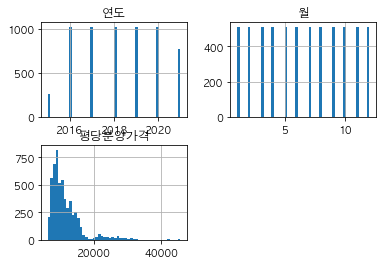

In [26]:
# df.hist()

df_last.hist(bins = 50)

# 시각화한 값을 보면 > 연도, 월은 범주형데이터에 가깝다
# 평당_분양가격은 연속된 수치형 데이터이다.

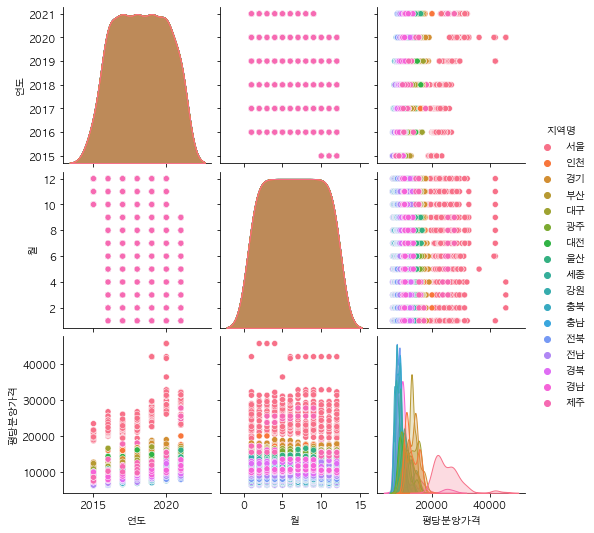

In [27]:
# pairplot

sns.pairplot(data = df_last , hue = "지역명")


# 서울은 이상치가 많이 나타나고 , 지역별로 분양가격의 차이가 크다라는 것을 알 수 있다.

## 2015년 8월 이전 데이터 보기

In [28]:
# 모든 컬럼이 출력되게 설정합니다.

pd.options.display.max_columns = None # 줄여서 데이터를 보여주고자 할때 활용 (숫자입력) >> 다 보여주고싶으면 None

In [29]:
# head 로 미리보기를 합니다.

df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,9110,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,8449,8403,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,9973,10016,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,7802,7707,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [30]:
# df_first 변수에 담겨있는 데이터프레임의 정보를 info를 통해 봅니다.
df_first.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

In [31]:
# 결측치가 있는지 봅니다.

df_first.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

### melt로 Tidy data 만들기
pandas의 melt를 사용하면 데이터의 형태를 변경할 수 있습니다. 
df_first 변수에 담긴 데이터프레임은 df_last에 담겨있는 데이터프레임의 모습과 다릅니다. 
같은 형태로 만들어주어야 데이터를 합칠 수 있습니다. 
데이터를 병합하기 위해 melt를 사용해 열에 있는 데이터를 행으로 녹여봅니다.

<img src="https://pandas.pydata.org/docs/_images/reshaping_melt.png" width="500">

* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-melt
* [Tidy Data 란?](https://vita.had.co.nz/papers/tidy-data.pdf)

In [32]:
# head 로 미리보기 합니다.
df_first.head(1)

# 기간이 모두 컬럼으로 되어있기 때문에 , 보기어려워서 전처리가 필요 > 기간이라는 컬럼으로 녹여보자 melt

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,19404,19759,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443


In [33]:
# head 로 미리보기 합니다.



In [34]:
# pd.melt 를 사용하며, 녹인 데이터는 df_first_melt 변수에 담습니다. 

df_first_melt = pd.melt(df_first, id_vars = "지역")
df_first_melt.head(2)

,지역,variable,value
0,서울,2013년12월,18189
1,부산,2013년12월,8111


In [35]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 
# ["지역명", "기간", "평당분양가격"] 으로 변경합니다.

df_first_melt.columns = ["지역명", "기간", "평당분양가격"]  # 컬림 이름 변경 방법(순서대로)
df_first_melt.head(1)

## 만약 컬럼 전체 이름이 아니라, 특정 부분의 컬럼 이름을 변경하고자한다면,
### df.rename(columns = {"기존 컬럼명" : "바꾸고자하는 컬럼명"})
#### 변경한 내용을 할당해야 저장이 됨.  >> 할당하지 않고 저장할때 inplace 기능을 통해 할수도 있지만 추천하진 않음.

,지역명,기간,평당분양가격
0,서울,2013년12월,18189


### 연도와 월을 분리하기
* pandas 의 string-handling 사용하기 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling

In [36]:
date = "2013년12월"
date
# 위의 식은 pandas가 아닌 Python 의 문자열 형식이다.

'2013년12월'

In [37]:
# split 을 통해 "년"을 기준으로 텍스트를 분리해 봅니다.

date.split("년")

['2013', '12월']

In [38]:
# 리스트의 인덱싱을 사용해서 연도만 가져옵니다.

date.split("년")[0]

'2013'

In [39]:
# 리스트의 인덱싱과 replace를 사용해서 월을 제거합니다.

date.split("년")[1].replace("월", "")

'12'

In [40]:
# parse_year라는 함수를 만듭니다.
# 연도만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_year(date) :
    year = date.split("년")[0]
    year = int(year)
    return year


In [41]:
# 제대로 분리가 되었는지 parse_year 함수를 확인합니다.

parse_year("2015년10월")

2015

In [42]:
# parse_month 라는 함수를 만듭니다.
# 월만 반환하도록 하며, 반환하는 데이터는 int 타입이 되도록 합니다.

def parse_month(date) :
    month = date.split("년")[1].replace("월", "")
    mouth = int(month)
    return month

In [43]:
# 제대로 분리가 되었는지 parse_month 함수를 확인합니다.

parse_month("2013년12월")

'12'

In [44]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 연도만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["연도"] = df_first_melt["기간"].map(parse_year)

In [45]:
# df_first_melt 변수에 담긴 데이터프레임에서 
# apply를 활용해 월만 추출해서 새로운 컬럼에 담습니다.

df_first_melt["월"] = df_first_melt["기간"].map(parse_month)
df_first_melt


,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12
...,...,...,...,...,...
352,전북,2015년8월,6580,2015,8
353,전남,2015년8월,6289,2015,8
354,경북,2015년8월,7037,2015,8
355,경남,2015년8월,7665,2015,8


In [46]:
# 컬럼명을 리스트로 만들때 버전에 따라 tolist() 로 동작하기도 합니다.
# to_list() 가 동작하지 않는다면 tolist() 로 해보세요.

df_first_melt.columns.tolist()

['지역명', '기간', '평당분양가격', '연도', '월']

In [47]:
# df_last와 병합을 하기 위해서는 컬럼의 이름이 같아야 합니다.
# sample을 활용해서 데이터를 미리보기 합니다.

df_last.sample()

,지역명,연도,월,평당분양가격,전용면적
888,울산,2016,8,8787.9,85~102


In [48]:
cols = ['지역명', '연도', '월', '평당분양가격']
cols

['지역명', '연도', '월', '평당분양가격']

In [49]:
# 최근 데이터가 담긴 df_last 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "전체"만 사용하도록 합니다.
# loc를 사용해서 전체에 해당하는 면적만 copy로 복사해서 df_last_prepare 변수에 담습니다.

df_last_prepare = df_last.loc[ df_last["전용면적"] == "모든면적" , cols].copy()
df_last_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3


In [50]:
# df_first_melt에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_first_prepare 변수에 담습니다.

df_first_prepare = df_first_melt[cols].copy()
df_first_prepare.head(1)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189


### concat 으로 데이터 합치기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png">

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

In [51]:
# df_first_prepare 와 df_last_prepare 를 합쳐줍니다.
# 합쳐줄때는 데이터 프레임을 리스트에 담아주고 합쳐주어야함

df = pd.concat( [df_first_prepare, df_last_prepare ])
df.shape

(1581, 4)

In [52]:
# 제대로 합쳐졌는지 미리보기를 합니다.

df.head(2)

,지역명,연도,월,평당분양가격
0,서울,2013,12,18189.0
1,부산,2013,12,8111.0


In [53]:
# 연도별로 데이터가 몇개씩 있는지 value_counts를 통해 세어봅니다.

df["연도"].value_counts()

2014    204
2016    204
2017    204
2018    204
2019    204
2020    204
2015    187
2021    153
2013     17
Name: 연도, dtype: int64

## groupby 로 데이터 집계하기
groupby 를 통해 데이터를 그룹화해서 연산을 해봅니다.

<AxesSubplot:xlabel='지역명'>

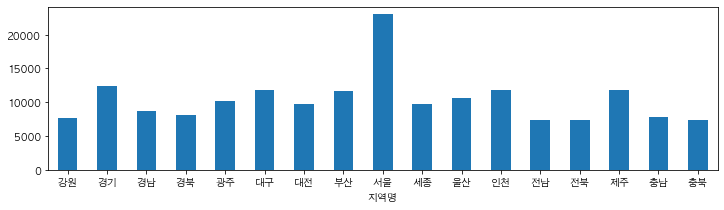

In [54]:
# 지역명으로 분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
# df.groupby(["인덱스로 사용할 컬럼명"])["계산할 컬럼 값"].연산()

df.groupby( by = ["지역명"])["평당분양가격"].mean().plot.bar(rot = 0, figsize = (12,3))

In [55]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
df.groupby(["연도", "지역명"])["평당분양가격"].mean()

연도    지역명
2013  강원      6230.000000
      경기     10855.000000
      경남      6473.000000
      경북      6168.000000
      광주      6098.000000
                 ...     
2021  전남      9966.366667
      전북      8784.600000
      제주     23790.800000
      충남      9264.566667
      충북      8634.633333
Name: 평당분양가격, Length: 153, dtype: float64

## pivot table 로 데이터 집계하기
* groupby 로 했던 작업을 pivot_table로 똑같이 해봅니다.
* https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-and-pivot-tables

In [56]:
# 지역명을 index 로 평당분양가격 을 values 로 구합니다.

df.pivot_table( index = "지역명", values = "평당분양가격")
# pd.pivot_table(data=df, index = "지역명", values = "평당분양가격")

,평당분양가격
지역명,
강원,7701.655914
경기,12477.155914
경남,8661.929032
경북,8163.291398
광주,10114.936559
대구,11799.490323
대전,9779.794624
부산,11729.804301
서울,22991.492473


In [57]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
# g = df.groupby(["연도", "지역명"])["평당분양가격"].mean()

df.pivot_table(index = ["연도", "지역명"], values = "평당분양가격")

평당분양가격
연도   지역명              
2013 강원    6230.000000
     경기   10855.000000
     경남    6473.000000
     경북    6168.000000
     광주    6098.000000
...                ...
2021 전남    9966.366667
     전북    8784.600000
     제주   23790.800000
     충남    9264.566667
     충북    8634.633333

[153 rows x 1 columns]

In [58]:
# 연도를 인덱스로, 지역명을 컬럼으로 평당분양가격을 피봇테이블로 그려봅니다.
df_a = df.pivot_table(index = "연도", columns = "지역명", values = "평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='연도'>

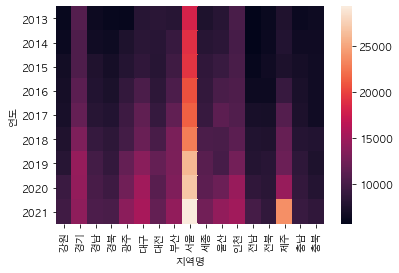

In [59]:
# 위에서 그린 피봇테이블을 히트맵으로 표현해 봅니다.

sns.heatmap(df_a )

<AxesSubplot:xlabel='지역명', ylabel='연도'>

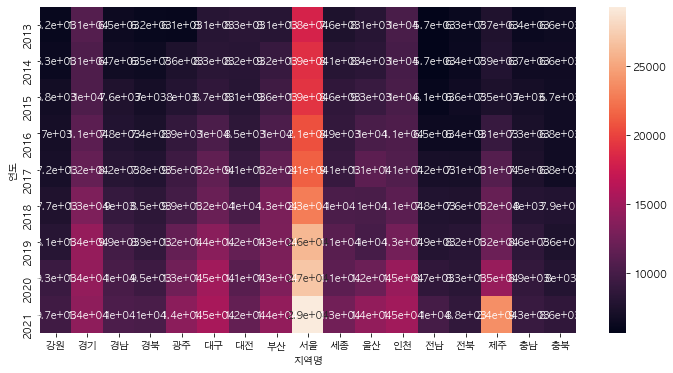

In [60]:
plt.figure(figsize = (12,6))
sns.heatmap(df_a , annot =True)

In [61]:
1e7

10000000.0

In [62]:
# transpose 를 사용하면 행과 열을 바꿔줄 수 있습니다.

df_a = df_a.transpose()

<AxesSubplot:xlabel='연도', ylabel='지역명'>

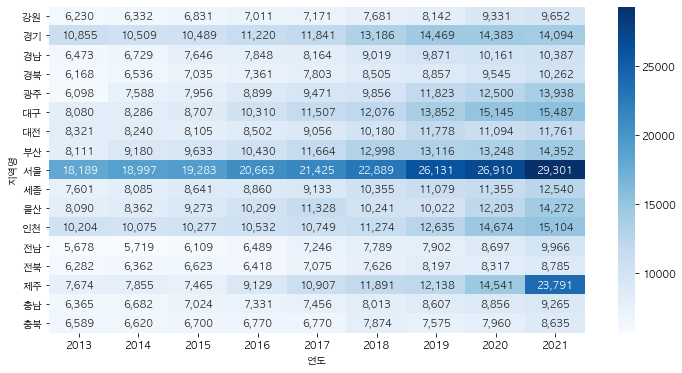

In [63]:
# 바뀐 행과 열을 히트맵으로 표현해 봅니다.
plt.figure(figsize = (12,6))
sns.heatmap(df_a, annot = True , fmt =",.0f" , cmap = "Blues")

## 2013년부터 최근 데이터까지 시각화하기
### 연도별 평당분양가격 보기

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

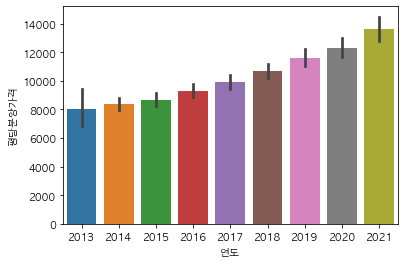

In [64]:
# barplot 으로 연도별 평당분양가격 그리기
sns.barplot(data = df, x = "연도", y = "평당분양가격")

#신뢰구간이 막대 상단 검정 부분 >> 이를 없애고 그릴경우에는 sns.barplot(data = df, x = "연도", y = "평당분양가격", ci = None)


<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

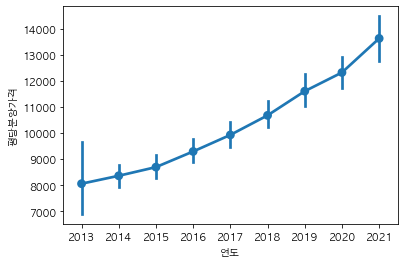

In [65]:
# pointplot 으로 연도별 평당분양가격 그리기
sns.pointplot(data = df, x = "연도", y = "평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

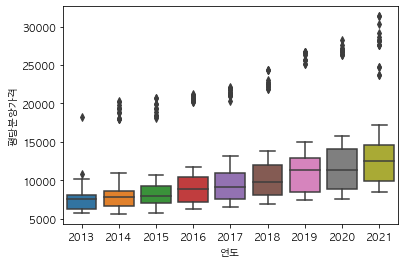

In [66]:
# 연도별 평당분양가격 boxplot 그리기
sns.boxplot(data = df, x = "연도", y = "평당분양가격")

# Boxplot은 이상치를 보는 것에 적합하다.
# 

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

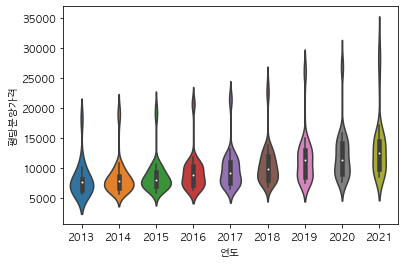

In [67]:
# 연도별 평당분양가격 violinplot 그리기
# 00밀도를 추정한

sns.violinplot(data = df, x = "연도", y = "평당분양가격")

/Users/parksungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 71.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/parksungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/parksungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/parksungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 69.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/parksungwon/opt/anaconda3

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

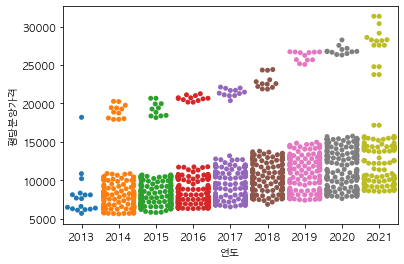

In [68]:
# 연도별 평당분양가격 swarmplot 그리기
# scatterplot 으로 그려주면 같은 값이나 겹치는 점들이 발생하여 제대로 데이터를 들여다 보지 못하는 경우가 발생하는데, 이러한 단점을 보완함
sns.swarmplot(data = df, x = "연도", y = "평당분양가격")

### 지역별 평당분양가격 보기

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

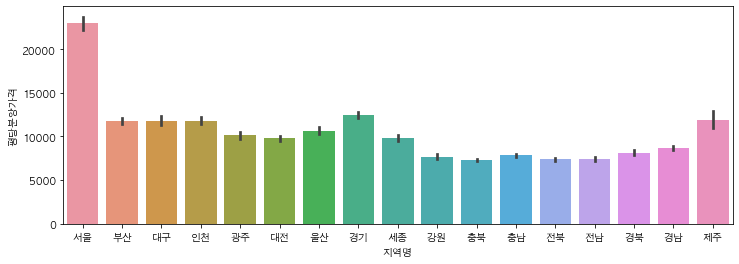

In [69]:
# barplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize = (12, 4))
sns.barplot(data = df, x = "지역명", y = "평당분양가격")

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

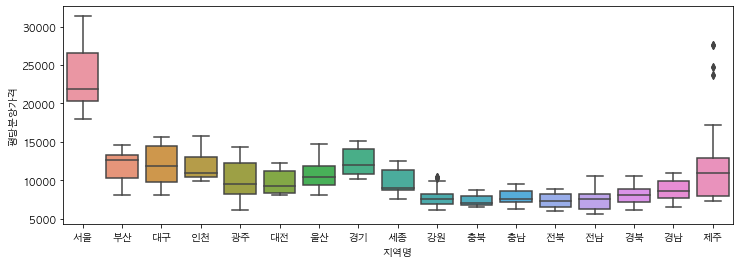

In [70]:
# boxplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize = (12, 4))
sns.boxplot(data = df, x = "지역명", y = "평당분양가격")

# 4분위 수를 표현하지만 값이 바뀌는 경우 표현이 어렵다  > 이를 보완한 것이 violinplot 임.

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

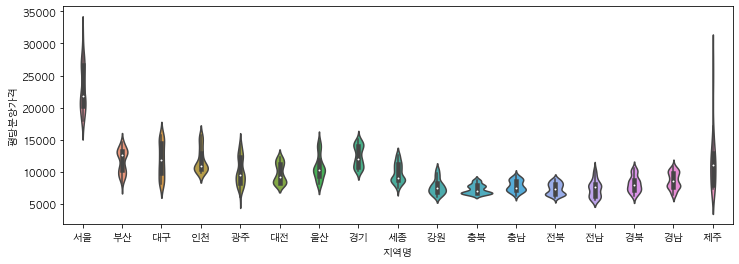

In [71]:
# violinplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize = (12, 4))
sns.violinplot(data = df, x = "지역명", y = "평당분양가격")

/Users/parksungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 7.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/parksungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/parksungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/parksungwon/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 32.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/parksungwon/opt/anaconda3/

<AxesSubplot:xlabel='지역명', ylabel='평당분양가격'>

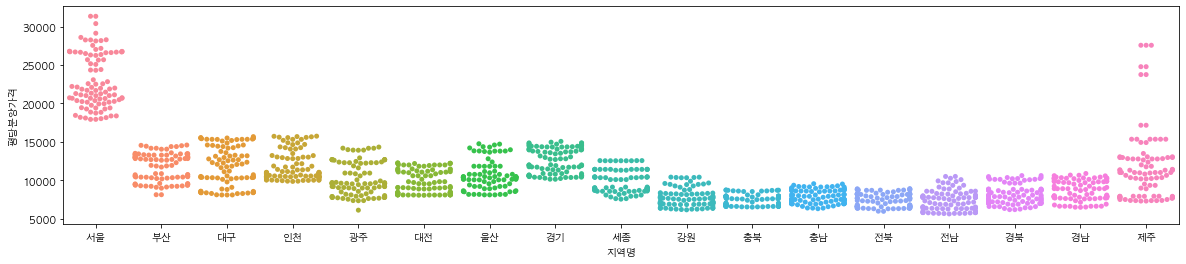

In [72]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize = (20, 4))
sns.swarmplot(data = df, x = "지역명", y = "평당분양가격")
# 경고메시지 뜨는 이유는 여러 점이 겹쳐서 나타내지 못하는 경우가 발생하기 때문에 그것에 대한 메시지임(참고)